In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook  as gnb
import pandas as pd
import numpy as np
from models import *
from sdm_fun import *
from matplotlib import pyplot as plt

In [4]:
def build_cid(weights_dict):
    cid = clinician_id()
    parametersA = utility_parameters_from_weights(weights_dict)
    calculate_utility_values(cid, "DoctorU", parametersA)
    return cid

def build_pid(weights_dict):
    parametersS = utility_parameters_from_weights(weights_dict)
    pid = patient_id()
    calculate_utility_values(pid, "PatientU", parametersS)
    return pid


In [5]:
cu_parameters = {
    "remission": 1/7,   
    "hypoparathyroidism": 1/7,  
    "laryngeal": 1/7,  
    "hepatoxicity": 1/7,
    "agranulocytosis": 1/7,
    "hypothyroidism": 1/7,
    "eye_post": 1/7  
}

In [6]:
pu_parameters = {
    "remission": 1,   
    "hypothyroidism": 0,
    "cost": 1,
    "lifelong_thyroid_replacement": 2  
}

In [7]:
cid = build_cid(cu_parameters)
pid = build_pid(pu_parameters)

## Omega

Best decisions for I^P, I^C and I^Omega

In [8]:
cid = build_cid(cu_parameters)
print(show_decision_utilities(cid))
pid = build_pid(pu_parameters)
print(show_decision_utilities(pid))
anal_pars = cu_parameters.copy()
for var in [
    "remission",
    "lifelong_thyroid_replacement",
    "cost",
    "hypothyroidism"
    ]:
    anal_pars = preference_transfer(var, pid, cid, pu_parameters, anal_pars)
print(show_decision_utilities(cid))

({'antithyroid': 84.11707142857149, 'RAI': 82.97376315789474, 'thyroidectomy': 82.99514285714288}, 84.11707142857149, 'antithyroid')
({'antithyroid': 49.99999999999999, 'RAI': 60.00000000000002, 'thyroidectomy': 45.75}, 60.00000000000002, 'RAI')
({'antithyroid': 78.0245242424242, 'RAI': 69.48590287081338, 'thyroidectomy': 41.202478787878796}, 78.0245242424242, 'antithyroid')


## Informed Patient

Analysis for informed patient.
Make a chance node transfer. If that node is a parent of utility node in I^C but did not exist in I^P also make a preference transfer

In [9]:
def analysis(analysis_variables, origin_model, target_model, origin_utility_pars, target_utility_pars, combinations=1, chance_transfer = True):
    results = dict()
    for vars in itertools.combinations(analysis_variables,combinations):
        origin_temp = gum.InfluenceDiagram(origin_model)
        target_temp = gum.InfluenceDiagram(target_model)
        target_pars = target_utility_pars.copy()
        for var in vars:
            chance_node_transfer(var, origin_temp, target_temp)
        for var in vars:
            if not target_model.exists(var):
                try: 
                    target_pars = preference_transfer(var, 
                                                origin_temp, 
                                                target_temp, 
                                                origin_utility_pars, 
                                                target_pars)
                except Exception as e:
                    print(e)
        _, meu, meud = show_decision_utilities(target_temp)
        results[vars] = [meu, meud]
    return results



Transfer 1 - 13 node combinations. All results are in results_informed_patient

In [10]:
cid = build_cid(cu_parameters)
pid = build_pid(pu_parameters)
cid_vars = cid.names()
cid_treatment = "treatment"
cid_utility = "DoctorU"
pid_treatment = "treatment"
pid_utility = "PatientU"
analysis_vars = cid_vars.difference(
    set((
        cid_treatment, 
        cid_utility,
        "goiter",
        "Pre_TSH_Level",
        "Post_TSH_Level"
        )))

results_informed_patient = dict()

for i in range(1,13):
    results_informed_patient[i] = analysis(analysis_vars, cid, pid, cu_parameters, pu_parameters,i)

'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye disease'
'eye d

In [12]:
# results_informed_patient[i] shows the MEU and decisions when i nodes are transferred
results_informed_patient[1]

{('lifelong_thyroid_replacement',): [57.075749999999985, 'antithyroid'],
 ('eye_post',): [58.72155172413793, 'RAI'],
 ('remission',): [78.68421052631581, 'RAI'],
 ('agranulocytosis',): [61.37931034482761, 'RAI'],
 ('hepatoxicity',): [61.37931034482761, 'RAI'],
 ('hyperthyroidism',): [60.00000000000002, 'RAI'],
 ('cost',): [62.50000000000001, 'antithyroid'],
 ('hypoparathyroidism',): [61.37931034482761, 'RAI'],
 ('laryngeal',): [61.37931034482761, 'RAI'],
 ('smoking',): [60.00000000000002, 'RAI'],
 ('hypothyroidism',): [60.00000000000002, 'RAI'],
 ('eye disease',): [41.97000000000001, 'RAI']}

/var/folders/9n/9lkkvf597sj5m9hzjvtjj89c0000gn/T/ipykernel_1509/3010121940.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left')


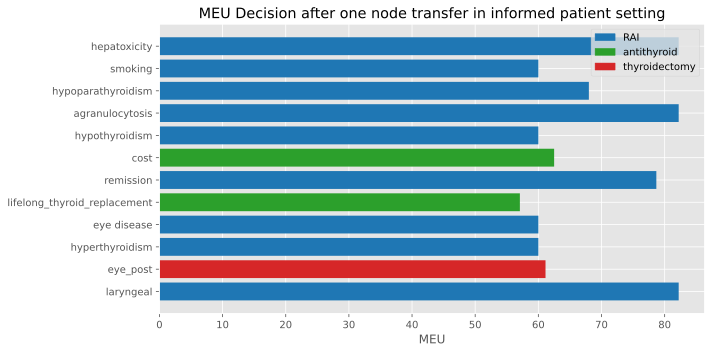

In [56]:
import matplotlib.patches as mpatches
plt.style.use('ggplot')

graph_data = results_informed_patient[1]
colors = {'RAI': '#1f77b4', 'antithyroid': '#2ca02c', 'thyroidectomy': '#d62728'}
labels = [k[0] for k in graph_data.keys()]
values = [float(v[0]) for v in graph_data.values()]
treatments = [v[1] for v in graph_data.values()]

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(
    labels,
    values,
    color = [colors[treatment] for treatment in treatments],
   # colors=[colors['RAI'], colors['antithyroid'], colors['thyroidectomy']]
)
ax.set_xlabel('MEU')
ax.set_title('MEU Decision after one node transfer in informed patient setting')
ax.legend(loc='lower left')


legend_patches = [mpatches.Patch(color=color, label=label) 
                  for label, color in colors.items()]
ax.legend(handles=legend_patches, loc='upper right')
plt.tight_layout()
plt.show()

In [57]:
def meu_rates(results):
    # meu rates computes the probability of MEU decisions for all number of nodes transferred
    # it takes results_informed_patient as input
    meudecisions = np.array(list(results.values()))[:,1]
    unique, counts = np.unique(meudecisions, return_counts=True)
    return dict(zip(unique.tolist(), (counts / counts.sum()).tolist()))

In [58]:
meudecisions_informed = pd.DataFrame([meu_rates(results_informed_patient[k]) for k in results_informed_patient.keys()], index=results_informed_patient.keys())
meudecisions_informed

,RAI,antithyroid,thyroidectomy
1,0.750000,0.166667,0.083333
2,0.575758,0.257576,0.166667
3,0.459091,0.295455,0.245455
4,0.381818,0.303030,0.315152
5,0.327020,0.304293,0.368687
6,0.280303,0.319264,0.400433
7,0.231061,0.361111,0.407828
8,0.173737,0.436364,0.389899
9,0.109091,0.545455,0.345455
10,0.045455,0.681818,0.272727


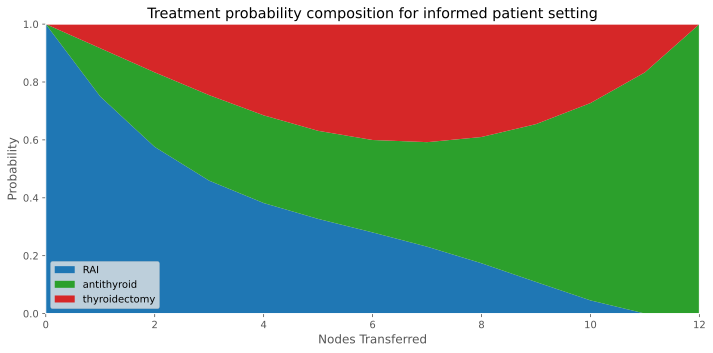

In [59]:
# Plot for probability of decisions at each iteration
df = meudecisions_informed.copy()
df.loc[0] = [1, 0, 0]
df = df.astype(float).sort_index().fillna(0.0)

colors = {'RAI': '#1f77b4', 'antithyroid': '#2ca02c', 'thyroidectomy': '#d62728'}

fig, ax = plt.subplots(figsize=(10,5))
ax.stackplot(
    df.index,
    df['RAI'], df['antithyroid'], df['thyroidectomy'],
    labels=['RAI','antithyroid','thyroidectomy'],
    colors=[colors['RAI'], colors['antithyroid'], colors['thyroidectomy']]
)
ax.set_ylim(0, 1)
ax.set_xlim(0,12)
ax.set_xlabel('Nodes Transferred')
ax.set_ylabel('Probability')
ax.set_title('Treatment probability composition for informed patient setting')
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Clinician as Agent

`ca_analysis` is analysis for professional as agent model. 
It just makes preference transfer for i combinations of nodes.

In [60]:
def ca_analysis(analysis_variables, origin_model, target_model, origin_utility_pars, target_utility_pars, combinations=1):
    results = dict()
    for vars in itertools.combinations(analysis_variables,combinations):
        origin_temp = gum.InfluenceDiagram(origin_model)
        target_temp = gum.InfluenceDiagram(target_model)
        target_pars = target_utility_pars.copy()
        for var in vars:
            try: 
                target_pars = preference_transfer(var, 
                                            origin_temp, 
                                            target_temp, 
                                            origin_utility_pars, 
                                            target_pars)
            except Exception as e:
                print(e)
        _, meu, meud = show_decision_utilities(target_temp)
        results[vars] = [meu, meud]
    return results


In [61]:
cid = build_cid(cu_parameters)
pid = build_pid(pu_parameters)
analysis_vars = [
    "lifelong_thyroid_replacement",
    "remission",
    "hypothyroidism",
    "cost"
    ]

results_clinician_agent = dict()
for i in range(1,5):
    results_clinician_agent[i] = ca_analysis(analysis_vars, pid, cid, pu_parameters, cu_parameters,i)

In [84]:
# results_clinician_agent[i] shows the MEU and decisions when i nodes are transferred
results_clinician_agent[1]

{('lifelong_thyroid_replacement',): [np.float64(86.55359600000003),
  'antithyroid'],
 ('remission',): [np.float64(92.138), 'thyroidectomy'],
 ('hypothyroidism',): [np.float64(96.90445454545454), 'thyroidectomy'],
 ('cost',): [np.float64(89.78741666666664), 'thyroidectomy']}

/var/folders/9n/9lkkvf597sj5m9hzjvtjj89c0000gn/T/ipykernel_1509/2731727295.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left')


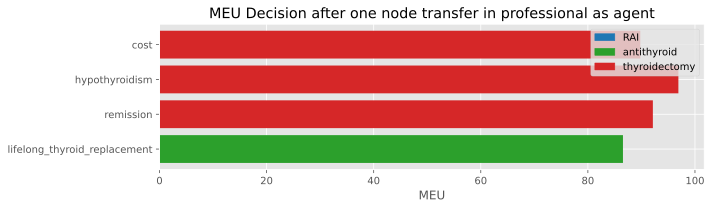

In [63]:
# Plot of MEUs and MEU decisions when one preference transferred in clinician as agent
graph_data = results_clinician_agent[1]
colors = {'RAI': '#1f77b4', 'antithyroid': '#2ca02c', 'thyroidectomy': '#d62728'}
labels = [k[0] for k in graph_data.keys()]
values = [float(v[0]) for v in graph_data.values()]
treatments = [v[1] for v in graph_data.values()]


fig, ax = plt.subplots(figsize=(10,3))
ax.barh(
    labels,
    values,
    color = [colors[treatment] for treatment in treatments],
   # colors=[colors['RAI'], colors['antithyroid'], colors['thyroidectomy']]
)
ax.set_xlabel('MEU')
ax.set_title('MEU Decision after one node transfer in professional as agent')
ax.legend(loc='lower left')


legend_patches = [mpatches.Patch(color=color, label=label) 
                  for label, color in colors.items()]
ax.legend(handles=legend_patches, loc='upper right')
plt.tight_layout()
plt.show()

In [64]:
# Probability of decisions after each preference transfer in professional as agent

meudecisions_agent = pd.DataFrame([meu_rates(results_clinician_agent[k]) for k in results_clinician_agent.keys()], index=results_clinician_agent.keys())

# Add RAI column if not present
if 'RAI' not in meudecisions_agent.columns:
    meudecisions_agent['RAI'] = 0

meudecisions_agent


,antithyroid,thyroidectomy,RAI
1,0.250000,0.750000,0
2,0.333333,0.666667,0
3,0.500000,0.500000,0
4,1.000000,NaN,0


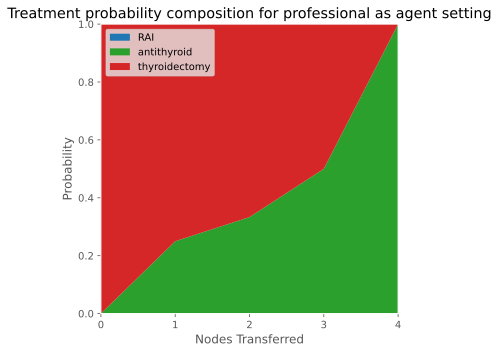

In [65]:
# Plot for probability of decisions for professional as agent
df = meudecisions_agent.copy()
df.loc[0] = [0, 1, 0]
df = df.astype(float).sort_index().fillna(0.0)

colors = {'RAI': '#1f77b4', 'antithyroid': '#2ca02c', 'thyroidectomy': '#d62728'}

fig, ax = plt.subplots(figsize=(5,5))
ax.stackplot(
    df.index,
    df['RAI'], df['antithyroid'], df['thyroidectomy'],
    labels=['RAI','antithyroid','thyroidectomy'],
    colors=[colors['RAI'], colors['antithyroid'], colors['thyroidectomy']]
)
ax.set_ylim(0, 1)
ax.set_xlim(0,4)
ax.set_xlabel('Nodes Transferred')
ax.set_ylabel('Probability')
ax.set_xticks(range(0, 5, 1)) # Set integer ticks from 0 to 12
ax.set_title('Treatment probability composition for professional as agent setting')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

## SDM

SDM will check if MEU from both agents are the same, if not it continues to next iteration

In [66]:
# Firstly modify professional as agent results so it has same number of rows as informed patient results
for i in range(5,13):
    meudecisions_agent.loc[i] = pd.Series({'RAI':0, 'thyroidectomy': 0, 'antithyroid':1})
    meudecisions_agent = meudecisions_agent.fillna(0)

meudecisions_agent

,antithyroid,thyroidectomy,RAI
1,0.250000,0.750000,0
2,0.333333,0.666667,0
3,0.500000,0.500000,0
4,1.000000,0.000000,0
5,1.000000,0.000000,0
6,1.000000,0.000000,0
7,1.000000,0.000000,0
8,1.000000,0.000000,0
9,1.000000,0.000000,0
10,1.000000,0.000000,0


In [67]:
# This shows probability of making a RAI, ATD, and throidectomy decisions given we reach step i in SDM
probs = (meudecisions_informed * meudecisions_agent).to_numpy()
probs[np.isnan(probs)] = 0

print(probs)


[[0.         0.04166667 0.0625    ]
 [0.         0.08585859 0.11111111]
 [0.         0.14772727 0.12272727]
 [0.         0.3030303  0.        ]
 [0.         0.30429293 0.        ]
 [0.         0.31926407 0.        ]
 [0.         0.36111111 0.        ]
 [0.         0.43636364 0.        ]
 [0.         0.54545455 0.        ]
 [0.         0.68181818 0.        ]
 [0.         0.83333333 0.        ]
 [0.         1.         0.        ]]


## SDM marginal probabilities
Below shows probability of making RAI, ATD and throidectomy decisions at step i in SDM (note that the one showed above is a conditional probability, this is marginal probability)

In [68]:
cumul_probs = 0
for i in range(12):
    probs[i] = (1 - cumul_probs) * probs[i]
    cumul_probs += probs[i].sum()
print(f"Total prob:{cumul_probs}")

# probs[5,1] += (1-cumul_probs)
print(probs)

Total prob:1.0
[[0.         0.04166667 0.0625    ]
 [0.         0.07691498 0.09953704]
 [0.         0.10627224 0.08828771]
 [0.         0.15903678 0.        ]
 [0.         0.11130566 0.        ]
 [0.         0.08124598 0.        ]
 [0.         0.06255634 0.        ]
 [0.         0.04829525 0.        ]
 [0.         0.0340262  0.        ]
 [0.         0.01933307 0.        ]
 [0.         0.00751841 0.        ]
 [0.         0.00150368 0.        ]]


In [69]:
# Probabiltiy of making ATD decision at any step
probs[:,1].sum()

np.float64(0.7496752563513929)

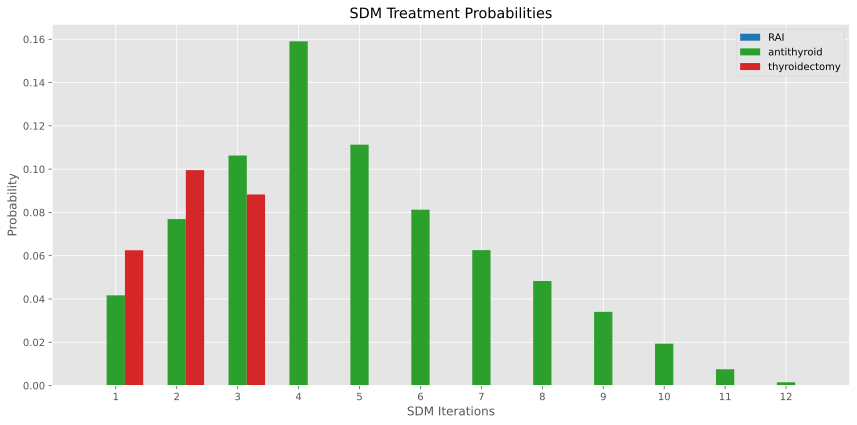

In [70]:
# Plot probability of decisions in SDM
labels = ['RAI', 'antithyroid', 'thyroidectomy']
colors = {'RAI': '#1f77b4', 'antithyroid': '#2ca02c', 'thyroidectomy': '#d62728'}
n_groups = probs.shape[0]
index = np.arange(n_groups)
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each category
for i, label in enumerate(labels):
    ax.bar(index + i * bar_width, probs[:, i], bar_width,
           label=label, color=colors[label])

ax.set_xlabel('SDM Iterations')
ax.set_ylabel('Probability')
ax.set_title('SDM Treatment Probabilities')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(np.arange(1, n_groups + 1))
ax.legend()

plt.tight_layout()
plt.show()

In [71]:
# Expected number of steps to make a decision
((probs[:,1] + probs[:,2]) * np.arange(1,13)).sum()

np.float64(4.145471384557192)

## Value of Evidence

voe function is imported from sdm_fun.py

In [72]:
# Value of evidence for CID
cid = build_cid(cu_parameters)
pid = build_pid(pu_parameters)
voe(cid)

,node,label,utility
5,eye_post,no,4.709240e+00
22,hypothyroidism,no,4.217391e+00
12,lifelong_thyroid_replacement,0,4.203238e+00
28,smoking,no,1.152261e+00
10,eye disease,no,8.702085e-01
3,laryngeal,no,6.521739e-01
8,Post_TSH_Level,1,6.127834e-01
9,Post_TSH_Level,2,1.327508e-01
24,hypoparathyroidism,no,8.695652e-02
21,goiter,Large,2.842171e-14


## Pretty Names and Clean Diagrams

In [73]:
cid = build_cid(cu_parameters)
pid = build_pid(pu_parameters)

# Doctor model pretty names
cid.variable("treatment").setName("Treatment"),
cid.variable("DoctorU").setName("Doctor Utility")
cid.variable("eye disease").setName("Thyroid Eye Disease")
cid.variable("smoking").setName("Smoking")
cid.variable("hyperthyroidism").setName("Hyperthroidism")
cid.variable("goiter").setName("Goiter")
cid.variable("Pre_TSH_Level").setName("Pre-TSH Level Status")
cid.variable("eye_post").setName("Post-treatment Eye Disease")
cid.variable("hypothyroidism").setName("Hypothyroidism")
cid.variable("remission").setName("Remission")
cid.variable("Post_TSH_Level").setName("Post-TSH Level Status")
cid.variable("hypoparathyroidism").setName("Hypoparathyroidism")
cid.variable("laryngeal").setName("Laryngeal")
cid.variable("hepatoxicity").setName("Hepatoxicity")
cid.variable("agranulocytosis").setName("Agranulocytosis")
cid.variable("lifelong_thyroid_replacement").setName("Lifelong Thyroid Replacement")
cid.variable("cost").setName("Cost")

# Patient model pretty names
pid.variable("smoking").setName("Smoking")
pid.variable("goiter").setName("Goiter")
pid.variable("lifelong_thyroid_replacement").setName("Lifelong Thyroid Replacement")
pid.variable("treatment").setName("Treatment")
pid.variable("remission").setName("Remission")
pid.variable("hypothyroidism").setName("Hypothyroidism")
pid.variable("cost").setName("Cost")
pid.variable("PatientU").setName("Patient Utility")

In [74]:
def turn_into_bn(cid):
    decision_nodes = [node for node in cid.nodes() if cid.isDecisionNode(node)]
    decision_node_id = decision_nodes[0]
    utility_nodes = [node for node in cid.nodes() if cid.isUtilityNode(node)]
    utility_node_id = utility_nodes[0]
    cid.erase(utility_node_id)
    treatment_children = cid.children(decision_node_id)
    cid.erase(decision_node_id)
    treatment = cid.add(gum.LabelizedVariable("Treatment", "Treatment"),17)  
    for child in treatment_children:
        cid.addArc(17, child)

In [75]:
gum.config["influenceDiagram", "default_chance_bgcolor"] = "white"
gum.config["influenceDiagram", "default_decision_bgcolor"] = "white"
gum.config["influenceDiagram", "default_utility_bgcolor"] = "white"

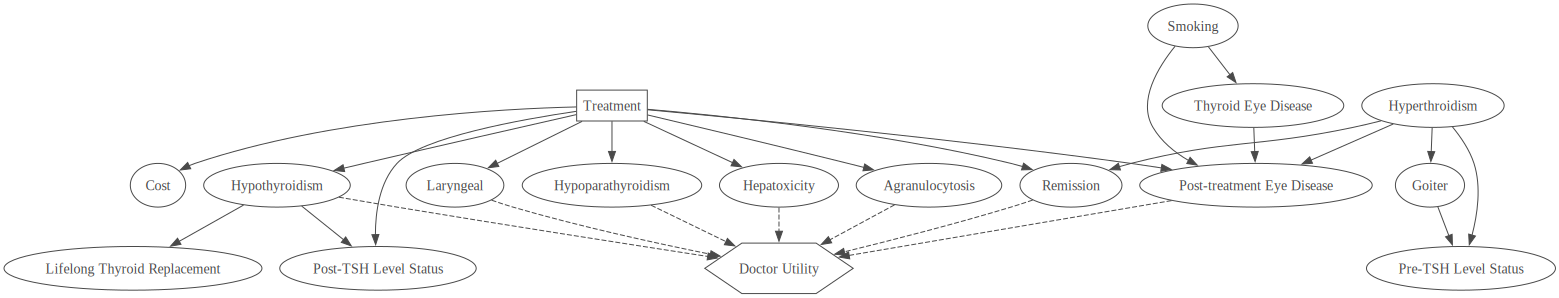

In [76]:
gnb.showInfluenceDiagram(cid, size="25")

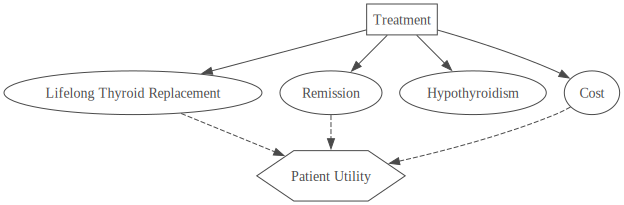

In [77]:
pid.erase("smoking")
pid.erase("goiter")
pid.erase("hyperthyroidism")
pid.eraseArc("hypothyroidism", "PatientU")
gnb.showInfluenceDiagram(pid, size="15")

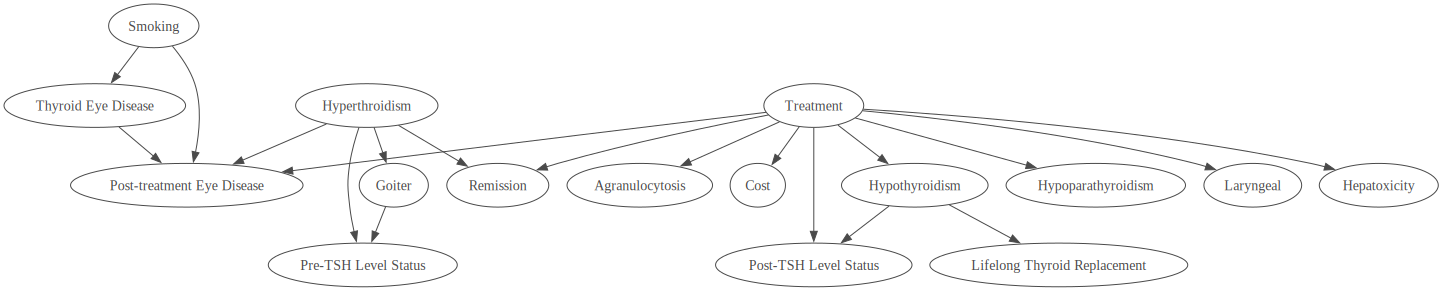

In [78]:
turn_into_bn(cid)
gnb.showInfluenceDiagram(cid, size="25")